## Алгоритм Apriori
Для анализа рыночной корзины c помощью алгоритма Apriori воспользуемся его реализацией в библиотеке mlxtend. Набор данных содержит 38765 строк заказов на покупку в продуктовых магазинах.

In [ ]:
!pip install mlxtend

In [ ]:
# импортируем необходимые модули и прочитаем наборы данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

basket = pd.read_csv("Groceries_dataset.csv")
display(basket.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Группировка по транзакциям
Набор данных записывает покупки отдельных товаров в строку. Необходимо сгруппировать эти покупки по корзинам товаров.
После этого с помощью TransactionEncoder закодируем транзакции в формат, подходящий для функции Apriori.

In [ ]:
basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
basket = basket.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Датафрейм записывает каждую строку как транзакцию, а товары, которые были куплены в ходе транзакции, будут записаны как True.

### Apriori и правила ассоциаций
Алгоритм Apriori генерирует частые наборы элементов при условии, что минимальная поддержка равна 6 из общего числа транзакций. Далее генерируются правила ассоциаций, и из них выбираются те, для которых значение Lift > 1,5.

In [ ]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 3)
rules = association_rules(frequent_itemsets, metric="conviction",  min_threshold = 1.3)
display(rules.head())
print("Rules identified: ", len(rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492
1,"(canned beer, chicken)",(whole milk),0.001136,0.157923,0.000401,0.352941,2.234896,0.000222,1.301392,0.553180
2,"(hygiene articles, canned beer)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997
3,"(chewing gum, soda)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092
4,"(pork, citrus fruit)",(other vegetables),0.001337,0.122101,0.000468,0.350000,2.866475,0.000305,1.350614,0.652011


Rules identified:  9


### Визуализация
Чтобы визуализировать правила ассоциаций, можно изобразить их в виде трехмерной точечной диаграммы. Правила, расположенные ближе к правому верхнему углу, являются наиболее значимыми для дальнейшего изучения.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


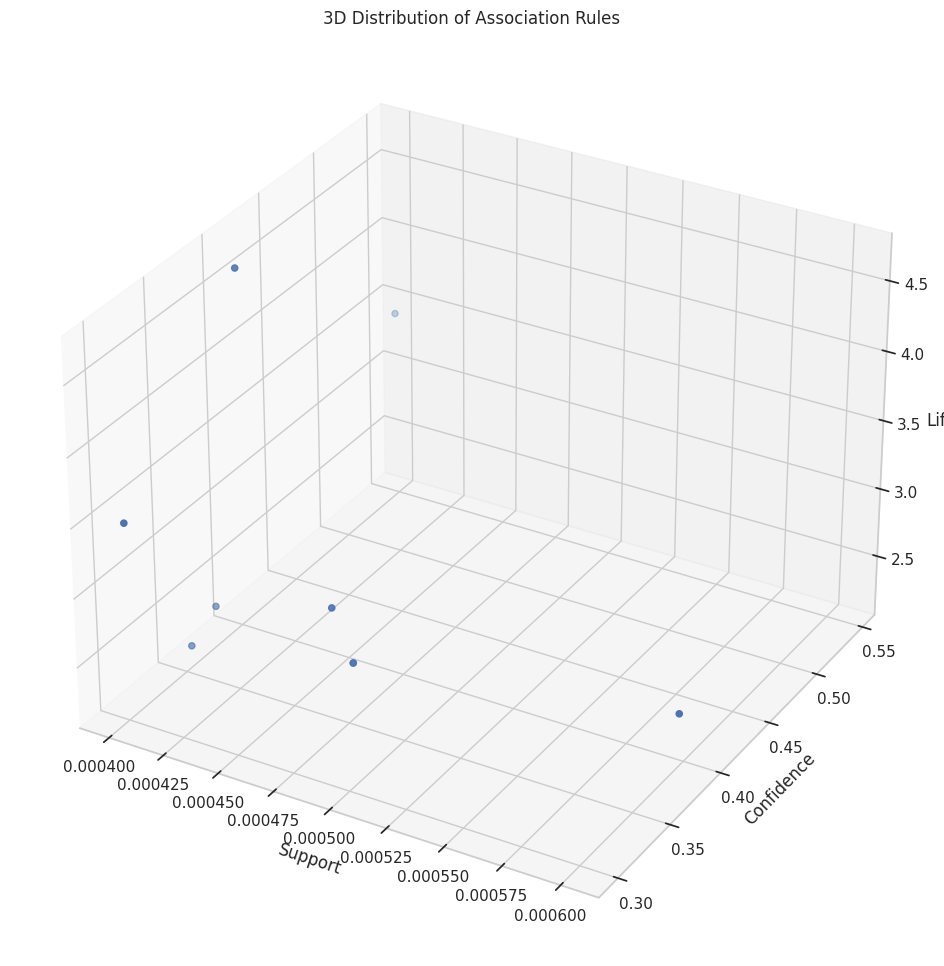

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

Другой тип визуализации, позволяющий рассмотреть взаимосвязь между продуктами, — это сетевой граф.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:24: DeprecationWarning: invalid escape sequence '\d'
<>:24: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-46-740617e7e6fd>:24: DeprecationWarning: invalid escape sequence '\d'
  if re.compile("^[R]\d+$").fullmatch(node) != None:


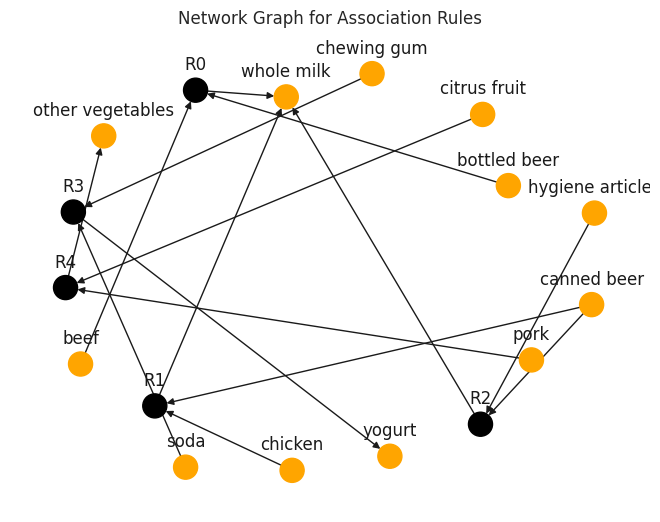

In [ ]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()

  # Перебор количества правил для отображения
  for i in range(rules_to_show):

    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']:
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)

    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]

  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')

  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)

  # Сдвиг расположения текста вверх
  for p in pos:
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 5) # ограничиваем вывод 10 правилами

### Применение полученных правил
Допустим, владельцы магазина закупили слишком много цельного молока и теперь есть вероятность, что товар пропадет, если его не удастся распродать вовремя. При этом они не могут позволить себе промо-скидку на молоко из-за низкой рентабельности его продаж. Один из возможных способов решения проблемы — выяснить, какие продукты стимулируют продажи цельного молока, и предложить скидки на эти товары.

In [ ]:
milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,0.461695
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360


Для заданного набора данных выполнить поиск ассоциативных правил с помощью алгоритмов Apriori и FP-growth.
1. Реализовать алгоритмы с использованием соответствующих модулей библиотеки mlxtend и библиотеки apyori.
2. Подобрать значения параметров алгоритма так, чтобы получить обоснованные, но неочевидные правила.
3. Привести пять наиболее достоверных правила.
4. Сравнить результаты, полученные разными алгоритмами.

In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(transactions, min_support=6/len(basket), use_colnames = True, max_len = 3)
# print the frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)
...,...,...
1966,0.000468,"(frozen dessert, yogurt)"
1967,0.000401,"(frozen dessert, newspapers)"
1968,0.000601,"(frozen dessert, soda)"
1969,0.000468,"(frozen dessert, canned beer)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="conviction",  min_threshold = 1.3)
display(rules.head())
print("Rules identified: ", len(rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(hygiene articles, canned beer)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997
1,"(bottled beer, beef)",(whole milk),0.001069,0.157923,0.000401,0.375000,2.374577,0.000232,1.347323,0.579492
2,"(sugar, other vegetables)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079
3,"(canned beer, chicken)",(whole milk),0.001136,0.157923,0.000401,0.352941,2.234896,0.000222,1.301392,0.553180
4,"(onions, yogurt)",(whole milk),0.001270,0.157923,0.000468,0.368421,2.332918,0.000267,1.333289,0.572079


Rules identified:  9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


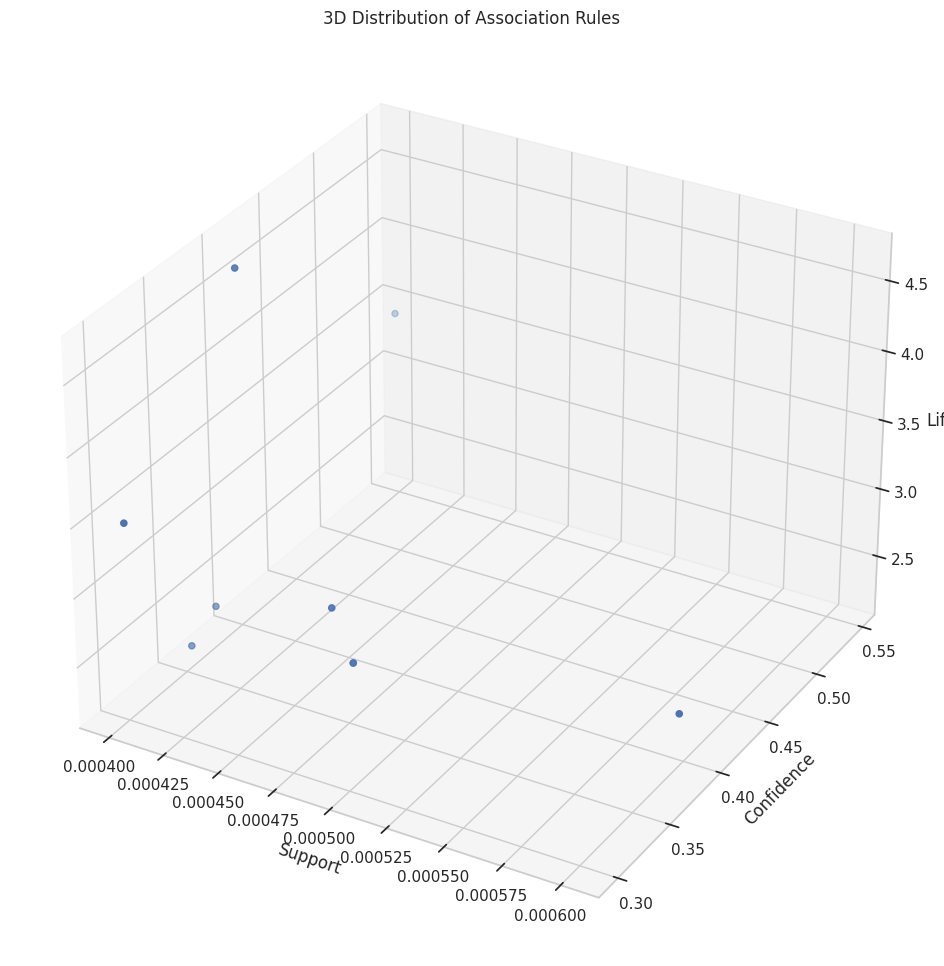

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


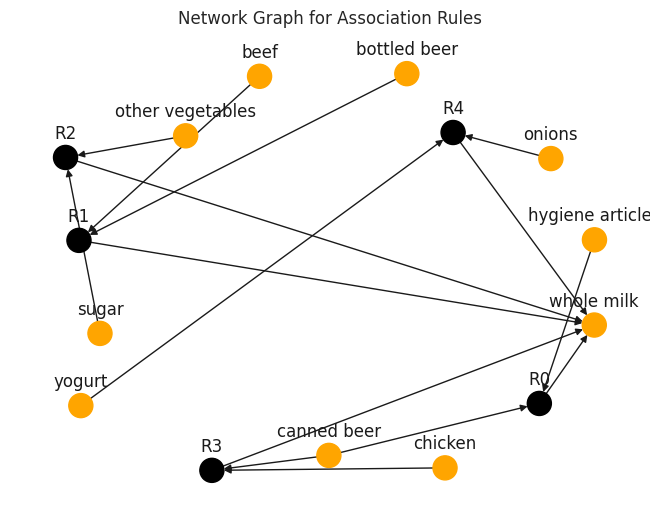

In [ ]:
draw_network(rules, 5) # ограничиваем вывод 10 правилами

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
